In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 7s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

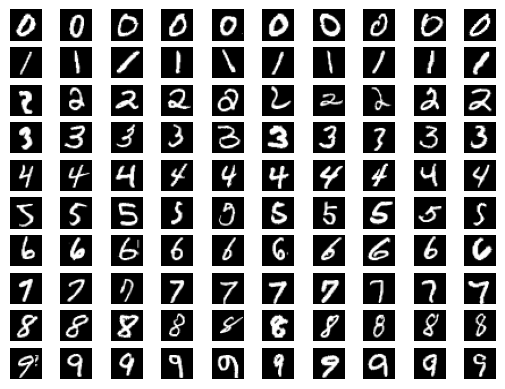

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10,10)

for i in range(10):
    for j in range(10):
        target = np.random.choice(np.where(y_train == i)[0])
        axs[i][j].axis('off')
        axs[i][j].imshow(X_train[target], cmap='gray')

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

y_train_ohe.shape, y_test_ohe.shape

((60000, 10), (10000, 10))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Flatten
from tensorflow.random import set_seed
from tensorflow.keras.backend import clear_session

clear_session()
set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train_ohe, epochs=100, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 9.8564 - accuracy: 0.8383
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0516 - accuracy: 0.8781
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6877 - accuracy: 0.8826
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5639 - accuracy: 0.8860
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3963 - accuracy: 0.8865
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2532 - accuracy: 0.8878
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3101 - accuracy: 0.8882
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3304 - accuracy: 0.8880
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 5.1195 - accuracy: 0.8903
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

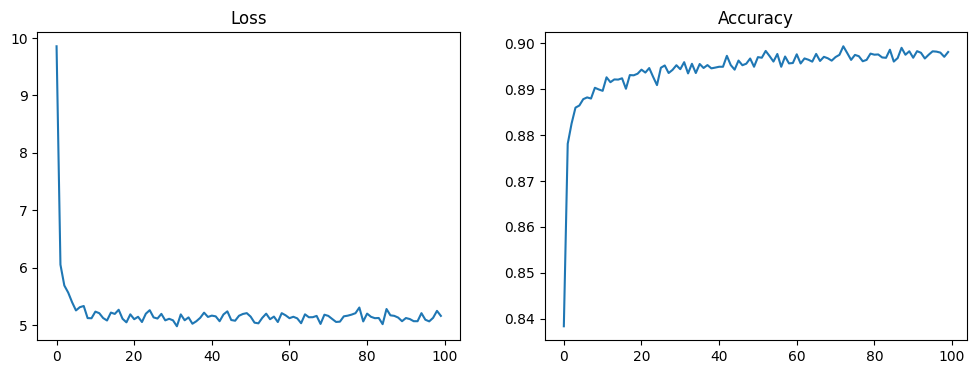

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
import pickle 
filename = 'model.pickle'
pickle.dump(model, open(filename, "wb"))